In [1]:
# In[0]: IMPORTS
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

from emnist import list_datasets
list_datasets()
#['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
#Classes:
#classes 0 -> 9: số 0 đến 9.
#10: A
#11: B
#12: c, C
#13: D
#14: E
#15: F
#16: G
#17: H
#18: i, I
#19: j, J
#20: k, K
#21: l, L
#22: m, M
#23: N 
#24: o, O
#25: p, P 
#26: Q
#27: R
#28: s, S
#29: T 
#30: u, U
#31: v, V 
#32: w, W 
#33: x, X
#34: y, Y 
#35: z, Z
#36: a
#37: b
#38: d
#39: e
#40: f 
#41: g
#42: h
#43: n
#44: q
#45: r
#46: t


['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [24]:
#Get train test.
from emnist import extract_training_samples
X_train, y_train_before = extract_training_samples('bymerge')

#Get test set.
from emnist import extract_test_samples
X_test, y_test_before = extract_test_samples('bymerge')

#In ra kiểm tra số lượng image train và test.
#X_train, X_test là samples, y_train, y_test là nhãn.
print("x_train shape:", X_train.shape, "y_train shape:", y_train_before.shape)
print("x_test shape:", X_test.shape, "y_test shape:", y_test_before.shape)

x_train shape: (697932, 28, 28) y_train shape: (697932,)
x_test shape: (116323, 28, 28) y_test shape: (116323,)


In [25]:
#Đổi matrix 28*28 pixel, thành một mảng 1 chiều 784 phần tử.
X_train = X_train.reshape(697932,784)
X_test = X_test.reshape(116323,784)
print(X_train.shape)

(697932, 784)


In [26]:
# 1.3. Plot a digit image
#Function để vẽ hình ra
#Chỉ cần đưa mảng 2 chiều của một hình, nó sẽ vẽ được hình hoàn chỉnh.
#Trước khi vẽ, cần kéo mảng 1 chiều thành mảng 2 chiều 28*28 pixel.
def plot_digit(data, label = 'unspecified'):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("letter: " + str(label))
    #plt.axis("off")
    plt.show()
#sample_id = 10

#Vẽ một hình ở row thứ sample_id, truyền vào feature, và label. 
sample_id = 15
#plot_digit(X_train[sample_id], y_train[sample_id])

In [2]:
# SAVE X_train & X_test

if 0:
    joblib.dump(X_train, 'saved_var/data/X_train')
    joblib.dump(X_test, 'saved_var/data/X_test')
else:
    X_train = joblib.load('saved_var/data/X_train')
    X_test = joblib.load('saved_var/data/X_test')
print(X_train.shape)
print('done')

(697932, 784)
done


In [3]:
# MERGE CLASS 15 AND 40 (F & f)

if 0:
    y_train = np.array([])
    y_test = np.array([])
    for i in range (0, y_train_before.size):
        if y_train_before[i] == 40:
            y_train = np.append(y_train, [15])
        else:
            y_train = np.append(y_train, [y_train_before[i]])
    joblib.dump(y_train, 'saved_var/data/y_train')
    for i in range (0, y_test_before.size):
        if y_test_before[i] == 40:
            y_test = np.append(y_test, [15])
        else:
            y_test = np.append(y_test, [y_test_before[i]])
    joblib.dump(y_test, 'saved_var/data/y_test')
else:
    y_train = joblib.load('saved_var/data/y_train')
    y_test = joblib.load('saved_var/data/y_test')

y_test_before = None
y_train_before = None
print('done')
#

done


In [28]:
#============================= RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#Fit với data chưa được scale
if 0:
   rf_clf = rf_clf.fit(X_train, y_train)
   joblib.dump(rf_clf, 'saved_var/rf_clf')
else:
   rf_clf = joblib.load('saved_var/rf_clf')
print('học xong RandomForestClassifier')


học xong RandomForestClassifier


In [4]:
# predict_proba y_probas_rf
if 0:
  y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3, n_jobs=-1, method ="predict_proba")
  joblib.dump(y_probas_rf, 'saved_var/y_probas_forest')
else:
  y_probas_rf = joblib.load('saved_var/y_probas_forest')
print('xong predict_proba y_probas_rf')

xong predict_proba y_probas_rf


In [3]:
from sklearn.model_selection import cross_val_score
if 0:
    rf_acc_before_scaling = cross_val_score(rf_clf, X_train, y_train, cv=3, n_jobs=-1, scoring="accuracy")
    joblib.dump(rf_acc_before_scaling,'saved_var/rf_acc_before_scaling')
else:
    rf_acc_before_scaling = joblib.load('saved_var/rf_acc_before_scaling')
print('Random forest accuraccy before scaling')
print(rf_acc_before_scaling)

Random forest accuraccy
[0.86137188 0.86108819 0.86168567]


In [4]:
if 0:
    train_score_before_scale = rf_clf.score(X_train, y_train)
    joblib.dump(train_score_before_scale,'saved_var/train_score_before_scale')
else:
    train_score_before_scale = joblib.load('saved_var/train_score_before_scale')
print(train_score_before_scale)

if 0:
    test_score_before_scale = rf_clf.score(X_test, y_test)
    joblib.dump(test_score_before_scale,'saved_var/test_score_before_scale')
else:
    test_score_before_scale = joblib.load('saved_var/test_score_before_scale')

print(test_score_before_scale)

Accuracy score on train set
0.9999942687826321
Accuracy score on test set
0.866122778814164


In [29]:
### 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse
print('Ok')

Ok


In [8]:
#Calculate on Train set

if 0:
    r2score, rmse = r2score_and_rmse(rf_clf, X_train, y_train)
    r2score_rmse =[r2score, rmse]
    joblib.dump(r2score_rmse,'saved_var/r2score_rmse')
else:
    r2score_rmse =  joblib.load('saved_var/r2score_rmse')
    r2score = r2score_rmse[0]
    rmse = r2score_rmse[1]

print('Calculate on Train set')
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
print('===========================================')

FileNotFoundError: [Errno 2] No such file or directory: 'saved_var/r2score_rmse'

In [31]:
#Calculate on Test set
if 1:
    r2score_test, rmse_test = r2score_and_rmse(rf_clf, X_test, y_test)
    r2score_rmse_test =[r2score_test, rmse_test]
    joblib.dump(r2score_rmse_test,'saved_var/r2score_rmse_test')
else:
    r2score_rmse_test =  joblib.load('saved_var/r2score_rmse_test')
    r2score_test = r2score_rmse_test[0]
    rmse_test = r2score_rmse_test[1]
print('Calculate on Test set')
print('R2 score (on testing data, best=1):', r2score_test)
print("Root Mean Square Error: ", rmse_test.round(decimals=1))
print('===========================================')

Calculate on Test set
R2 score (on testing data, best=1): 0.866122778814164
Root Mean Square Error:  8.0


In [37]:
# [5] Try Predict
print("Random forest predict:")
print(rf_clf.predict(X_test[:20]))
print("Actual result:")
print(y_test[:20])


Random forest predict:
[ 0. 22. 28.  0. 45.  8.  5.  1.  4.  3. 22. 45. 19.  1.  5. 24.  6.  1.
 39.  6.]
Actual result:
[24. 22. 28.  0.  5.  8.  5.  1.  4.  3. 22. 45. 19.  1.  5. 24.  6. 21.
 39.  6.]


In [8]:
# ERROR ANALYSIS
if 0:
    predict_rf_test = rf_clf.predict(X_test)
    joblib.dump(predict_rf_test,'saved_var/predict_rf_test')
else:
    predict_rf_test = joblib.load('saved_var/predict_rf_test')
print(predict_rf_test)

[ 0. 22. 28. ...  3.  3.  7.]


In [21]:
# MORE DATA
# ERROR ANALYSIS
from emnist import extract_test_samples
X_test, y_test_before = extract_test_samples('bymerge')
if 1:
    predict_rf_test_more = rf_clf_more.predict(X_test)
    joblib.dump(predict_rf_test_more,'saved_var/predict_rf_test_more')
else:
    predict_rf_test_more = joblib.load('saved_var/predict_rf_test_more')
print(predict_rf_test_more)

NameError: name 'rf_clf_more' is not defined

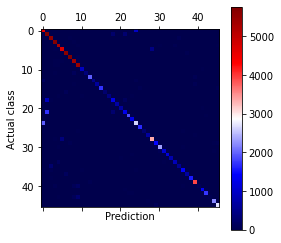

In [9]:
    ##Random forest
from sklearn.metrics import confusion_matrix  
conf_mat_rf = confusion_matrix(y_test, predict_rf_test) # row: actual class, col: prediction
let_plot = True;
if let_plot:
   plt.matshow(conf_mat_rf, cmap=plt.cm.seismic)
   plt.xlabel("Prediction")
   plt.ylabel("Actual class")
   plt.colorbar()
   #plt.savefig("figs/confusion_matrix_plot")
   plt.show()

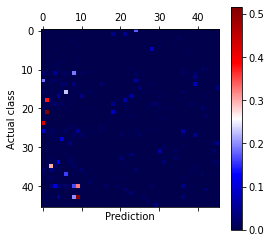

In [14]:
#Random forest
row_sums = conf_mat_rf.sum(axis=1, keepdims=True)
norm_conf_mat_rf = conf_mat_rf / row_sums
# Replace rates on diagonal (correct classifitions) by zeros    
if let_plot:
   np.fill_diagonal(norm_conf_mat_rf, 0)
   plt.matshow(norm_conf_mat_rf,cmap=plt.cm.seismic)
   plt.xlabel("Prediction")
   plt.ylabel("Actual class")
   plt.colorbar()
   #plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)
   plt.show()

In [5]:
# 8.4. Plot examples of 3s and 5s
def plot_digits(instances, images_per_row=10, **options):
   size = 28
   images_per_row = min(len(instances), images_per_row)
   images = [instance.reshape(size,size) for instance in instances]
   n_rows = (len(instances) - 1) // images_per_row + 1
   row_images = []
   n_empty = n_rows * images_per_row - len(instances)
   images.append(np.zeros((size, size * n_empty)))
   for row in range(n_rows):
       rimages = images[row * images_per_row : (row + 1) * images_per_row]
       row_images.append(np.concatenate(rimages, axis=1))
   image = np.concatenate(row_images, axis=0)
   plt.imshow(image, cmap = mpl.cm.binary, **options)
   plt.axis("off")

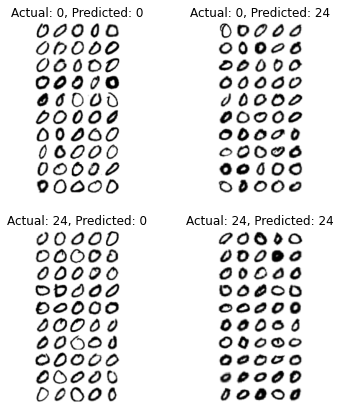

In [16]:
class_A = 0
class_B = 24
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()


In [ ]:
class_A = 18
class_B = 21
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()


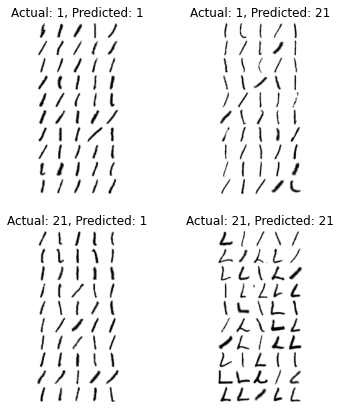

In [10]:
class_A = 1
class_B = 21
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()

In [12]:
class_A = 15
class_B = 40
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()


ZeroDivisionError: integer division or modulo by zero